<a href="https://colab.research.google.com/github/Camel-light/Assignments/blob/main/Copy_of_homework_7.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

The following assignment consists again of a theoretical part (learning portfolio) and a practical part (assignment). The goal is to train a neural model from scratch, as we did a few weeks ago. I would like us to repeat the most important things so that we can consolidate our knowledge in this area, for this you will train a model on a dataset that I will provide via OLAT. 

The plan would be that in the first we will discuss your learnings from the theory part, that means you are relatively free to fill your Learning Portfolio on this topic and in the following week we will discuss your solutions of the Classification Model.

#Theory part (filling your Learning Portfolio, May 24)

In preparation for the practical part, I ask you to familiarize yourself with the following video sources in the next week:

1) Please watch the following video until random forests:

https://course.fast.ai/Lessons/lesson5.html

2) Please download the following notebooks and edit it in Google-Colab. Take notes and update your Learning Portfolio.

https://www.kaggle.com/code/jhoward/ => [Performed while watching the videos](https://colab.research.google.com/drive/1-w4SL6GVRDbyk_QuLJx_4O57tTDfwh-Z#scrollTo=c26bb129linear-model-and-neural-net-from-scratch)

https://www.kaggle.com/code/jhoward/why-you-should-use-a-framework => [Performed while watching the videos](https://colab.research.google.com/drive/1edfPCGWizHXO0RHyuj9bXJuDmm9GDn-j)

The contents should be mostly known to you, because these contents are also based on chapter 4, which we have already worked on. We repeat the basics again with a new data set to consolidate our knowledge.

#Practical part (Assignment, May 31)

The following task is a binary classification task. The first column is our target. All variables are categorical variables from which you have to create dummy variables. The target column has only the property Q or F, which is to be modeled. As always, please create a train and a test data set, e.g. 80:20 or 90:10. Your goal is to create a neural network that best predicts the target column. Use probabilities with the sigmoid function as discussed in the theory. When designing your neural network, play with a few different numbers and sizes of layers and different activation functions.

To validate your model, you can compare your results with a logistic regression model. (Note: This data set should allow you to achieve very high accuracies: > 98% maybe even >99%) You can see how these results vary when you use 50% for testing and 50% for training.

I approached part 2 of the assignment by importing the data and creating the dummy variables using `get_dummies` from pandas. I excluded the first column which was our independent variable using `iloc`.
Then I used `TrainTestSplit` to split the data into 80% training & 20% test data. Then I proceeded to use `TabularDataLoaders` from FastAi to create the data loaders. I used `lr_find` to find good learning rates to use for training. I used `tabular_learner` to create a neural network and then finally tested it. The accuracy was very since the beginning. Then I run all the code again, but with another model using a variable learning rate, by `using learn.fit_one_cycle(10)`. The accuracy was similar, although from the graph, it appears as there are less drops because of the learning rate.

To finish, I also used a logistic regression, which also achived a high accuracy.




In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [116]:
import pandas as pd
from google.colab import drive
from google.colab import data_table
import matplotlib.pyplot as plt
data_table.enable_dataframe_formatter()

drive.mount('/content/drive')
data = pd.read_csv("/content/drive/MyDrive/Colab_Notebooks/Lab 7/data_homework_6.csv")

data.head(10)

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


,target,variable_1,variable_2,variable_3,variable_4,variable_5,variable_6,variable_7,variable_8,variable_9,...,variable_13,variable_14,variable_15,variable_16,variable_17,variable_18,variable_19,variable_20,variable_21,variable_22
0,Q,Y,T,O,U,Q,G,D,O,L,...,T,X,X,Q,X,P,Q,L,T,V
1,F,Y,T,Z,U,B,G,D,C,L,...,T,X,X,Q,X,P,Q,O,O,H
2,F,C,T,X,U,M,G,D,C,O,...,T,X,X,Q,X,P,Q,O,O,N
3,Q,Y,Z,X,U,Q,G,D,O,O,...,T,X,X,Q,X,P,Q,L,T,V
4,F,Y,T,H,G,O,G,X,C,L,...,T,X,X,Q,X,P,F,O,B,H
5,F,Y,Z,Z,U,B,G,D,C,O,...,T,X,X,Q,X,P,Q,L,O,H
6,F,C,T,X,U,B,G,D,C,H,...,T,X,X,Q,X,P,Q,L,O,N
7,F,C,Z,X,U,M,G,D,C,O,...,T,X,X,Q,X,P,Q,O,T,N
8,Q,Y,Z,X,U,Q,G,D,O,Q,...,T,X,X,Q,X,P,Q,L,W,H
9,F,C,T,Z,U,B,G,D,C,H,...,T,X,X,Q,X,P,Q,L,T,N


In [5]:
data.describe()

,target,variable_1,variable_2,variable_3,variable_4,variable_5,variable_6,variable_7,variable_8,variable_9,...,variable_13,variable_14,variable_15,variable_16,variable_17,variable_18,variable_19,variable_20,variable_21,variable_22
count,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124,...,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124
unique,2,6,4,10,2,9,2,2,2,12,...,4,9,9,1,4,3,5,9,6,7
top,F,Y,Z,O,G,O,G,D,C,C,...,T,X,X,Q,X,P,Q,X,W,E
freq,4208,3656,3244,2284,4748,3528,7914,6812,5612,1728,...,4936,4464,4384,8124,7924,7488,3968,2388,4040,3148


In [117]:
# Select all columns except the first one
columns_to_encode = data.columns[1:]

# Apply get_dummies() to the selected columns
encoded_columns = pd.get_dummies(data[columns_to_encode])

# Concatenate the first column and the encoded columns
data = pd.concat([data.iloc[:, 0], encoded_columns], axis=1)

In [19]:
data.head(10)

,target,variable_1_C,variable_1_D,variable_1_G,variable_1_L,variable_1_T,variable_1_Y,variable_2_G,variable_2_H,variable_2_T,...,variable_21_T,variable_21_W,variable_21_Z,variable_22_E,variable_22_H,variable_22_M,variable_22_N,variable_22_Q,variable_22_V,variable_22_X
0,Q,0,0,0,0,0,1,0,0,1,...,1,0,0,0,0,0,0,0,1,0
1,F,0,0,0,0,0,1,0,0,1,...,0,0,0,0,1,0,0,0,0,0
2,F,1,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,1,0,0,0
3,Q,0,0,0,0,0,1,0,0,0,...,1,0,0,0,0,0,0,0,1,0
4,F,0,0,0,0,0,1,0,0,1,...,0,0,0,0,1,0,0,0,0,0
5,F,0,0,0,0,0,1,0,0,0,...,0,0,0,0,1,0,0,0,0,0
6,F,1,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,1,0,0,0
7,F,1,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,1,0,0,0
8,Q,0,0,0,0,0,1,0,0,0,...,0,1,0,0,1,0,0,0,0,0
9,F,1,0,0,0,0,0,0,0,1,...,1,0,0,0,0,0,1,0,0,0


In [118]:
from sklearn.model_selection import train_test_split

# Split the dataset into train and test sets
train_data, test_data = train_test_split(data, test_size=0.2, random_state=42)

In [82]:
test_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1625 entries, 1971 to 3341
Columns: 118 entries, target to variable_22_X
dtypes: object(1), uint8(117)
memory usage: 211.1+ KB


In [83]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6499 entries, 7873 to 7270
Columns: 118 entries, target to variable_22_X
dtypes: object(1), uint8(117)
memory usage: 844.1+ KB


In [119]:
from fastai.tabular.all import *

# Create the DataLoaders
dls = TabularDataLoaders.from_df(data, y_names="target", valid_idx=test_data.index)

0.14454397559165955
0.009120108559727669


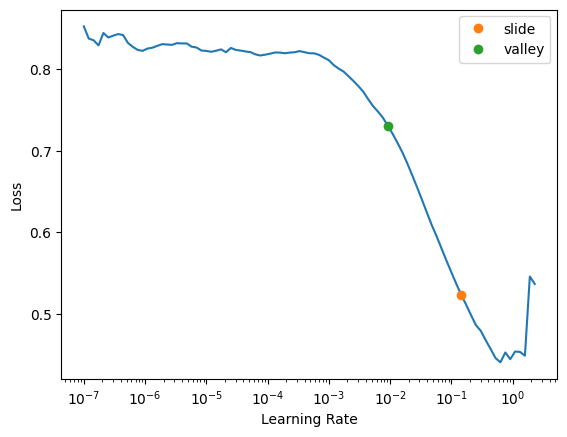

In [120]:
learn = tabular_learner(dls, metrics=accuracy, layers=[10, 10])
slide, valley = learn.lr_find(suggest_funcs=(slide, valley))
print(slide)
print(valley)

In [121]:
lr = (slide + valley) / 2
print(lr)

0.07683204207569361


epoch,train_loss,valid_loss,accuracy,time
0,0.018521,0.000073,1.000000,00:01
1,0.002575,0.000004,1.000000,00:00
2,0.013996,0.038081,0.996308,00:01
3,0.001916,0.000002,1.000000,00:00
4,0.024530,0.000115,1.000000,00:00
5,0.012535,0.000007,1.000000,00:01
6,0.003542,0.004033,0.996923,00:00
7,0.015051,0.002724,1.000000,00:00
8,0.002357,0.000019,1.000000,00:01
9,0.000338,0.000002,1.000000,00:01


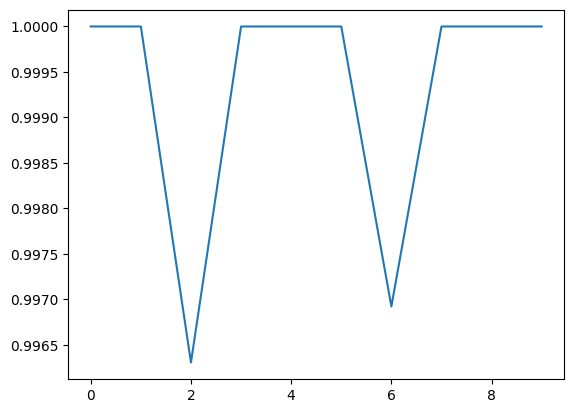

In [122]:
learn.fit(10, lr=lr)
plt.plot([x[2] for x in learn.recorder.values])

epoch,train_loss,valid_loss,accuracy,time
0,0.590302,0.466729,0.839385,00:01
1,0.274064,0.127349,0.985231,00:01
2,0.089885,0.029544,1.000000,00:01
3,0.030370,0.013538,0.999385,00:01
4,0.013686,0.005674,1.000000,00:01
5,0.007044,0.003130,1.000000,00:01
6,0.004816,0.002157,1.000000,00:01
7,0.003009,0.001613,1.000000,00:01
8,0.002321,0.001277,1.000000,00:01
9,0.002227,0.001310,1.000000,00:01


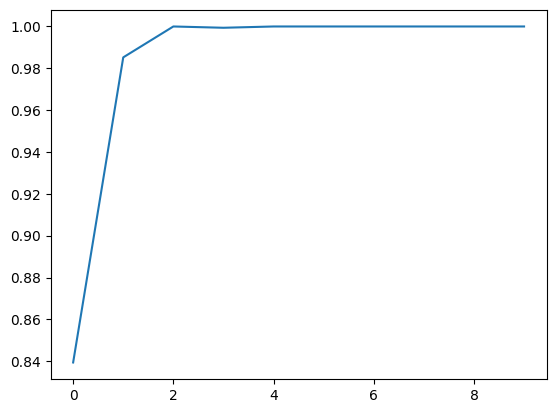

In [106]:
learn.fit_one_cycle(10)
plt.plot([x[2] for x in learn.recorder.values])

# Logistic regression

I used a logistic regression to compare

In [123]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

# Create an instance of LogisticRegression
logreg = LogisticRegression()

# Fit the logistic regression model to the training data
logreg.fit(train_data.iloc[:, 1:], train_data.iloc[:, 0])

# Predict the target variable for the test data
y_pred = logreg.predict(test_data.iloc[:, 1:])

# Calculate the accuracy of the model
accuracy = accuracy_score(test_data.iloc[:, 0], y_pred)
print("Accuracy:", accuracy)


Accuracy: 1.0


When we have discussed the assignment, I will tell you what the data set is about, which has its origin from our nature.